In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
books = pd.read_csv("./Books.csv")
ratings = pd.read_csv("./Ratings.csv")
users = pd.read_csv("./Users.csv")

C:\Users\SOUVIK\AppData\Local\Temp\ipykernel_23708\1647240688.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("./Books.csv")


In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
books =books.iloc[:,:-3]
books.rename(columns = { 'Book-Title':'title',
                        'Book-Author':'author',
                        'Year-Of-Publication':'year',
                        'Publisher':'publisher'}, inplace = True)
books.head()

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [11]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
users.rename(columns = {'User-ID':'userid',
                       'Location':'location',
                       'Age':'age'}, inplace = True)
users.head(2)

,userid,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [13]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [14]:
ratings.rename(columns = {'User-ID':'userid',
                         
                         'Book-Rating':'rating'},inplace = True)
ratings.head(2)

,userid,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


In [15]:
books_ratings = ratings.merge(books,on = 'ISBN')
books_ratings.head()

,userid,ISBN,rating,title,author,year,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


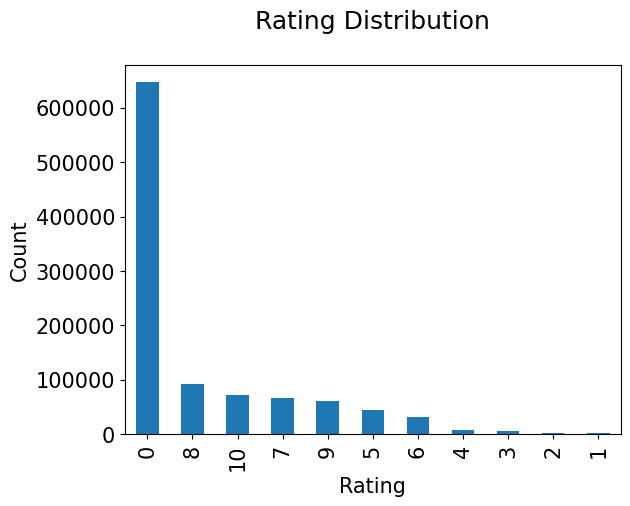

In [16]:
plt.rc("font", size=15)
books_ratings.rating.value_counts(sort=True).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<Axes: >

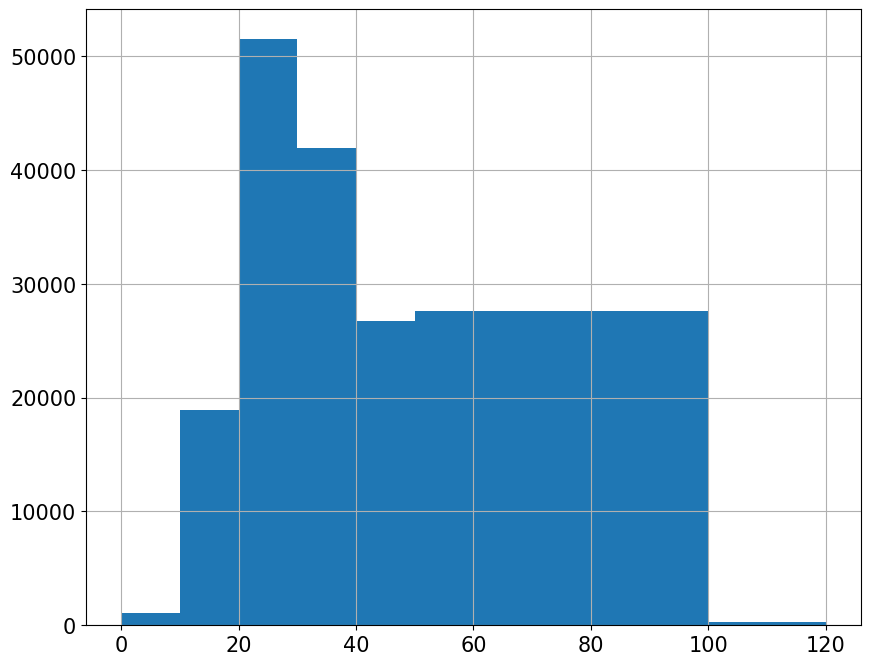

In [20]:
users.age.hist(figsize= [10, 8],bins=[0, 10, 20, 30, 40, 50, 100,120])

<Axes: >

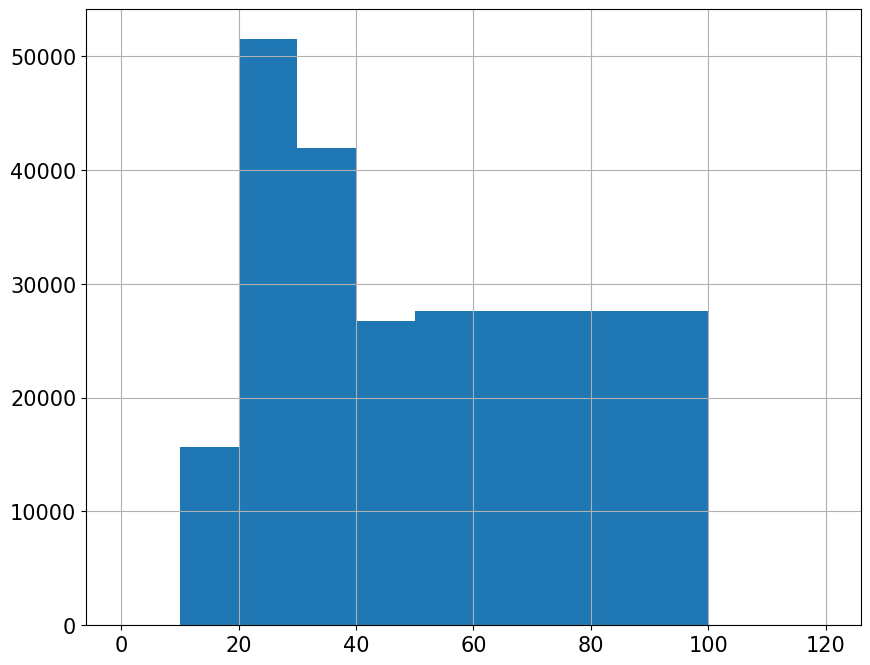

In [22]:
temp = users[users["age"]>=15]
temp =  temp[temp["age"]<=100]
users.age = temp.age
users.age.hist(figsize= [10, 8],bins=[0, 10, 20, 30, 40, 50, 100,120])

In [23]:
rat = ratings.userid.value_counts()>200
rat = rat[rat].index
rat

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [24]:
ratings = ratings[ratings.userid.isin(rat)]

In [25]:
ratings.shape

(526356, 3)

In [26]:
books_ratings = ratings.merge(books,on = 'ISBN')
books_ratings.shape

(487671, 7)

In [27]:
books_rating = books_ratings.groupby('title')['rating'].count().reset_index()
books_rating 

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160265,Ã?Â?lpiraten.,1
160266,Ã?Â?rger mit Produkt X. Roman.,1
160267,Ã?Â?stlich der Berge.,1


In [28]:
books_rating.rename(columns = {'rating':'no._of_total_ratings'},inplace = True)
books_rating.head()

,title,no._of_total_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [29]:
final_rating = books_ratings.merge(books_rating,on = 'title')
final_rating

,userid,ISBN,rating,title,author,year,publisher,no._of_total_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,1
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),1
487668,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",1
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,1


In [30]:
final_rating = final_rating[final_rating['no._of_total_ratings'] > 50]
final_rating

,userid,ISBN,rating,title,author,year,publisher,no._of_total_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228881,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228883,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228884,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [31]:
final_rating.drop_duplicates(['userid','title'],inplace = True)
final_rating.shape

C:\Users\SOUVIK\AppData\Local\Temp\ipykernel_23708\1667051646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_rating.drop_duplicates(['userid','title'],inplace = True)


(57952, 8)

In [32]:
book_pivot = final_rating.pivot_table(columns = 'userid',index = 'title',values = 'rating')
book_pivot

userid,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [33]:
book_pivot.fillna(0,inplace=True)
book_pivot

userid,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_score = cosine_similarity(book_pivot)
similarity_score.shape

(703, 703)

In [35]:
def recommend(bookname):
    index = np.where(book_pivot.index == bookname)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])),key = lambda x :x[1], reverse = True)[1:6]
    
    for i in similar_items:
        print(book_pivot.index[i[0]])

In [40]:
recommend('1984')

Animal Farm
The Handmaid's Tale
The Catcher in the Rye
Lord of the Flies
The Vampire Lestat (Vampire Chronicles, Book II)


In [41]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)
book_sparse

<703x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14507 stored elements in Compressed Sparse Row format>

In [42]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute')
model.fit(book_sparse)
model.get_params()

{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

In [43]:
distances , suggestions = model.kneighbors(book_pivot.iloc[8,:].values.reshape(1,-1), n_neighbors = 6)
distances

array([[ 0.        , 17.34935157, 21.61018278, 21.88606863, 22.97825059,
        23.13006701]])

In [44]:
suggestions

array([[  8, 356, 305, 173, 377,  92]], dtype=int64)

In [45]:
for i in suggestions:
    print(book_pivot.index[i])

Index(['A Civil Action', 'No Safe Place', 'Long After Midnight', 'Exclusive',
       'Pleading Guilty', 'CAT'S EYE'],
      dtype='object', name='title')


In [46]:
def title():
    book_name = input("Enter a book name - \n")
    print('\n')
    books=[]
    x = np.where(book_pivot.index == book_name)[0][0]
    distance , suggestion = model.kneighbors(book_pivot.iloc[x,:].values.reshape(1,-1), n_neighbors = 6)
    for i in range(len(suggestion)):
        if i == 0:
            print(' Suggestion for ',book_name,' are :')
            
        books.append(book_pivot.index[suggestion[i]])
    return books

In [52]:
title()

Enter a book name - 
1984


 Suggestion for  1984  are :


[Index(['1984', 'No Safe Place', 'A Civil Action', 'Foucault's Pendulum',
        'Long After Midnight', 'Master of the Game'],
       dtype='object', name='title')]